In [2]:
import torch
import torchvision
from femb.data.util import http_get, extract_archive
from femb.backbones import build_backbone
from femb.headers import LinearHeader, SphereFaceHeader, CosFaceHeader, ArcFaceHeader, MagFaceHeader
from femb.evaluation import VerificationEvaluator
from femb.data import LFWDataset, CelebADataset
from femb import FaceEmbeddingModel
from femb.preprocess.face_detection import preprocess_image
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

/home/ysyuk/Broj/pt-femb-face-embeddings/femb/data/util.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


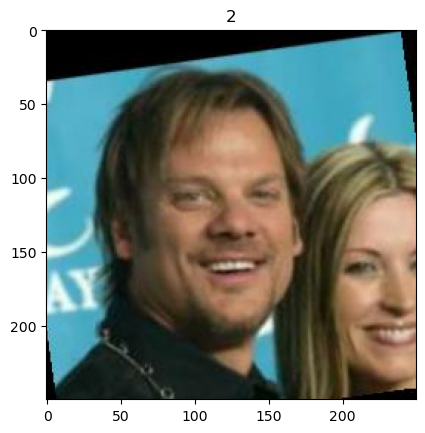

In [8]:
train_dataset = LFWDataset(split='train', aligned=True)
plt.imshow(train_dataset[22][0])
plt.title(train_dataset[2][1])
plt.show()

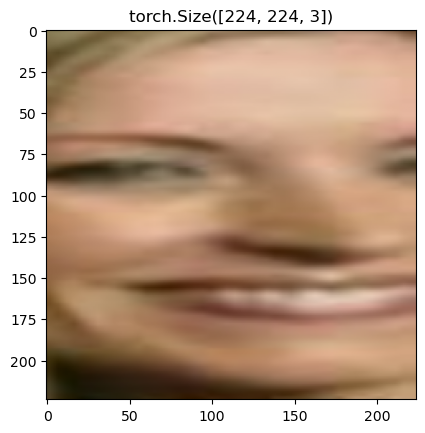

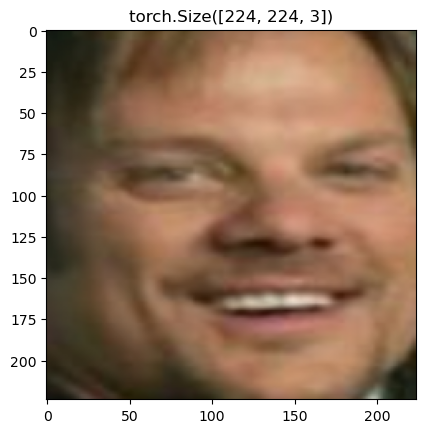

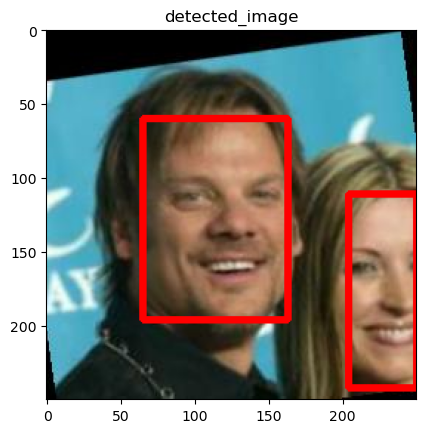

[tensor([[[0.5020, 0.5020, 0.5020,  ..., 0.3725, 0.3725, 0.3725],
         [0.5137, 0.5137, 0.5137,  ..., 0.4118, 0.4118, 0.4118],
         [0.5333, 0.5333, 0.5333,  ..., 0.4745, 0.4745, 0.4745],
         ...,
         [0.2902, 0.2902, 0.2902,  ..., 0.7686, 0.7686, 0.7686],
         [0.2980, 0.2980, 0.2941,  ..., 0.7647, 0.7647, 0.7647],
         [0.3020, 0.3020, 0.3020,  ..., 0.7608, 0.7608, 0.7608]],

        [[0.4627, 0.4627, 0.4627,  ..., 0.2471, 0.2471, 0.2471],
         [0.4706, 0.4706, 0.4706,  ..., 0.2824, 0.2824, 0.2824],
         [0.4863, 0.4863, 0.4863,  ..., 0.3412, 0.3412, 0.3412],
         ...,
         [0.2431, 0.2431, 0.2431,  ..., 0.6196, 0.6196, 0.6196],
         [0.2431, 0.2431, 0.2431,  ..., 0.6235, 0.6235, 0.6235],
         [0.2471, 0.2471, 0.2471,  ..., 0.6275, 0.6275, 0.6275]],

        [[0.3216, 0.3216, 0.3216,  ..., 0.1490, 0.1490, 0.1490],
         [0.3255, 0.3255, 0.3255,  ..., 0.1843, 0.1843, 0.1843],
         [0.3373, 0.3373, 0.3373,  ..., 0.2353, 0.2353, 0

In [ ]:
preprocess = preprocess_image
preprocess_dataset = LFWDataset(split='train', aligned=True, preprocess=preprocess)

print(preprocess_dataset[22][0])



In [ ]:
batch_size = 32 
device = 'cuda'

In [ ]:
# preprocessing transform (assuming alignment and so on)
# transform = torchvision.transforms.Compose([
#     torchvision.transforms.ToPILImage()
#     # torchvision.transforms.Resize((224, 224)),
#     # # torchvision.transforms.Resize((112, 112)),
#     # torchvision.transforms.ToTensor(),
#     # # torchvision.transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
#     # torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
#     # torchvision.transforms.RandomHorizontalFlip()
#     ])

preprocess = preprocess_image
train_dataset = LFWDataset(split='train', aligned=True, preprocess=preprocess)

print(train_dataset[2][0])
# plt.imshow(train_dataset[2][0])
# plt.show()
batch_size = 32 
device = 'cuda'
# train_dataloader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# pbar = tqdm(enumerate(train_dataloader), total=len(train_dataloader))
# for step, batch in pbar:

#     # # skip batch if singleton
#     # if len(batch[0]) <= 1:
#     #     continue

#     inputs = batch[0]
#     labels = batch[1]
#     print(type(inputs))
#     plt.imshow(inputs[0])
#     plt.title(labels[0])
#     plt.show()
#     # 배치의 이미지 텐서를 (B, C, H, W) 형식으로 변환
#     inputs = inputs.permute(0, 3, 1, 2)  # (B, H, W, C) -> (B, C, H, W)
#     # 첫 번째 이미지 텐서를 PIL 이미지로 변환
#     pil_image = torchvision.transforms.ToPILImage()(inputs[0].cpu())

#     tensor_img,_ = face_detection.preprocess_image(np.array(pil_image))

#     # plt.imshow(inputs[0])
#     # plt.title(labels[0])
#     # plt.show()

#     print(step)
#     if step == 1:
#         break